# Importing

In [3]:
import tensorflow as tf
import tensorflow_hub as hub

c:\anaconda\envs\machine_learning\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\anaconda\envs\machine_learning\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\anaconda\envs\machine_learning\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import umap # dimensionality reduction
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import hdbscan
from deep_translator import GoogleTranslator

# Loading Model

In [5]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)

# Preparing Dataset

In [6]:
dataset=pd.read_csv("arabic_data.csv",on_bad_lines='skip')
dataset.columns=["title","contents","category","author_name"]
dataset=dataset[:5000]

In [7]:
dataset.dropna(axis=0,inplace=True)
# removing all special characters 

exp='[\u0627-\u064aA-Za-z]+' #re to get arabic and english , i had eliminated numbers and special characters because they dont have much influence 
dataset["contents"]=dataset['contents'].apply(lambda data : " ".join(re.findall(exp,data)))
dataset["category"]=dataset["category"].apply(lambda data : " ".join(re.findall(exp,data)))
dataset["title"]=dataset["title"].apply(lambda data : " ".join(re.findall(exp,data)))
empty_str_contents=dataset.loc[dataset["contents"]==r""].index
empty_str_title=dataset.loc[dataset["title"]==r""].index
empty_str_category=dataset.loc[dataset["category"]==""].index
dataset.drop(list(empty_str_contents),axis=0,inplace=True)

In [8]:
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    # text = text.lower()
    # text = text.replace('x', '')
    return text

dataset["title"]=dataset["title"].apply(cleanText)
dataset["contents"]=dataset["contents"].apply(cleanText)
dataset["category"]=dataset["category"].apply(cleanText)

In [9]:
dataset=dataset[["title","contents","category"]]
dataset.reset_index(inplace=True)
data=dataset["title"]+dataset["contents"]+dataset["category"] 
data=data.to_list()

In [10]:
len(data),data[0]

(2367,
 'سمو نا ب ال مير وولي العهد يهن الملك تشارلز الثالثكونا بعث سمو نا ب ال مير وولي العهد الشيخ مشعل ال حمد ببرقية تهن ة لى صاحب الجلالة الملك تشارلز الثالث ملكalqabas')

# Experiment

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" # this is already a pretrained model ,so need of saving this model with our data
model = hub.load(module_url)

In [ ]:
embedding_gen = model(data) 

In [ ]:
similarity = cosine_similarity(embeddings)
print(similarity)

In [ ]:
embedding_gen.shape

In [ ]:
embedding_gen[1] #vector of 1st record

In [ ]:
#lets train the model with only one record and compare the results 

In [ ]:
temp_data=data[0]
temp_embedding_gen = model([temp_data]) 

In [ ]:
temp_embedding_gen,embedding_gen[0] #same

In [ ]:
#lets create a new model and check the results
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model1 = hub.load(module_url)
temp_data1=data[0]
temp_embedding_gen1 = model1([temp_data1]) 

In [ ]:
temp_embedding_gen1,embedding_gen[0]

# Observation :<br>
"https://tfhub.dev/google/universal-sentence-encoder/4" # this is already a pretrained model ,so no need of saving this model with our data

# Vectorizing 

In [11]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" # this is already a pretrained model ,so need of saving this model with our data
model = hub.load(module_url)

In [12]:
embedding_gen = model(data) 

In [13]:
embedding_gen.shape

TensorShape([2367, 512])

# Dimensionality Reduction

As seen above, all of our sentence embeddings have high dimensionality (>500 features each). A manifestation of the Curse of Dimensionality is that distance measures, such as Euclidean and Manhattan, needed for clustering become meaningless at such high dimensions (see for example “On the Surprising Behavior of Distance Metrics in High Dimensional Space” by Aggarwal et al for more details)

### UMAP dimensionality reduction

In [14]:
umap_embeddings = (umap.UMAP(n_neighbors=10, n_components=20, metric='cosine', 
                                random_state=24).fit_transform(embedding_gen))

As like PCA we can't find the information retained during the process using explained varience ratio  <br>
Reference : https://github.com/lmcinnes/umap/issues/122

In [74]:
print(type(umap_embeddings),'\n',umap_embeddings.shape,'\n',umap_embeddings)

<class 'numpy.ndarray'> 
 (2367, 20) 
 [[11.292786   4.4930706  6.284277  ...  4.6231523  4.4380713  4.905008 ]
 [11.331208   4.464798   6.295542  ...  4.6286917  4.419781   4.9183946]
 [11.35377    4.791566   4.87545   ...  5.359246   4.343744   4.793375 ]
 ...
 [ 7.9496636  7.9307013  1.9738984 ...  4.157019   4.433381   4.7930026]
 [ 3.1296065  9.762955   1.9660954 ...  3.2671206  4.51049    5.3855543]
 [10.941582   5.141905   4.8392134 ...  5.106749   4.424042   4.838405 ]]


# DBScan Clustering



### parameters for tuning:<br>
 * epslon and min samples
### problems :<br>
 * how to take points in a particular cluster
 * how to find most closest point to our input data point

In [137]:

model=DBSCAN(eps=0.02,min_samples=3)

In [138]:
model.fit(np.array(embedding_gen))

DBSCAN(eps=0.02, min_samples=3)

In [141]:
print(type(model.labels_),np.unique(model.labels_),len(model.labels_))
for i in np.unique(model.labels_):
    # print(i)
    print(i,"appeared",np.count_nonzero(model.labels_ == i),"times")

<class 'numpy.ndarray'> [-1] 2367
-1 appeared 2367 times


In [140]:
for i in np.unique(model.labels_):
    # print(i)
    print(i,"appeared",np.count_nonzero(model.labels_ == i),"times")

-1 appeared 2367 times


# K means Clustering

In [163]:
# from cv2 imp/ort kmeans
interia=[]  #SSE -->sum of squared distance 
clusters=500
for cluster in range(3,clusters,5):
    model=KMeans(cluster)
    model.fit(np.array(embedding_gen))
    interia.append(model.inertia_)


KeyboardInterrupt: 

Text(0, 0.5, 'interia')

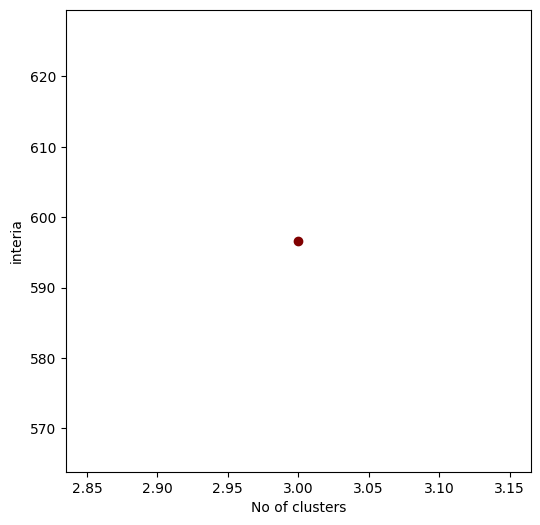

In [162]:
# plot to identify the elbow
plt.figure(figsize=(6, 6))
plt.plot(range(3,500,5), interia, '-o', c = 'maroon')
plt.xlabel('No of clusters')
plt.ylabel('interia')

In [150]:
np.array(embedding_gen)[1][1]

-0.036822043

# HDBscan

 it is preferable to use an algorithm that does not require specifying the number of clusters upfront and can also tolerate noisy data. Density-based algorithms are a good option here as they do not require specifying the number of clusters and are indifferent to cluster shape. Hierarchical Density-Based Spatial Clustering of Applications with Noise (HDBSCAN) has become popular since it has fewer and more intuitive hyperparameters than DBSCAN and is robust to variable-density clusters.

In [15]:
clusters = hdbscan.HDBSCAN(min_cluster_size = 3,
                               metric='euclidean', 
                               cluster_selection_method='eom').fit(umap_embeddings)
# hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
#                 gen_min_span_tree=False, leaf_size=40,metric='euclidean',
#                 min_cluster_size=5, min_samples=None, p=None)
print(clusters.labels_,len(clusters.labels_))
print(np.unique(clusters.labels_),'\n',len(np.unique(clusters.labels_)))

[101 101  -1 ...  91  10  -1] 2367
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154] 
 156


In [16]:
cluster=[]
for idx in range(len(clusters.labels_)):
    if clusters.labels_[idx]==10: #taking dataponits of 10th cluster
        cluster.append(idx)

In [18]:
news_cluster=[]
for dp in cluster:
    news_cluster.append(GoogleTranslator(source='auto', target='en').translate(data[dp][:200])) #limiting to 200 --> for easy translation
news_cluster

['France awards Sheikha Intisar Al-Sabah, the Legion of Honor, with the rank of Knight',
 'Kulthum Hussein Awad wins the presidency of the Arab Union for specialized women',
 'Kulthum Awad wins the presidency of the Arab Union for the specialized women',
 'The progressive movement rejects a map of restructuring the public sector, which is biased against the popular classes in favor of the big capitalists',
 'Kuwait is the world leader in terms of order and safety in schools',
 'The university president issues a decision to amend the distance education regulation',
 'The Lawyers’ Association The exclusion of nationality workers from the jurisdiction of the judiciary requires urgent legislative intervention The Kuwaiti Lawyers’ Association issued a statement on the Court of Cassation’s ruling regarding the court’s lack of jurisdiction in matters of nationality and that it is sovereign, and the text of the statement reads as follows',
 'The Martyr’s Office launches a competition to design

In [123]:
news_cluster=[]
for dp in cluster:
    news_cluster.append(GoogleTranslator(source='auto', target='en').translate(data[dp][:200])) #limiting to 200 --> for easy translation
news_cluster

['France awards Sheikha Intisar Al-Sabah, the Legion of Honor, with the rank of Knight',
 'Kulthum Hussein Awad wins the presidency of the Arab Union for specialized women',
 'Kulthum Awad wins the presidency of the Arab Union for the specialized women',
 'The progressive movement rejects a map of restructuring the public sector, which is biased against the popular classes in favor of the big capitalists',
 'Kuwait is the world leader in terms of order and safety in schools',
 'The university president issues a decision to amend the distance education regulation',
 'The Lawyers Association: Excluding nationality workers from the jurisdiction of the judiciary needs urgent legislative intervention',
 'The Martyr’s Office launches a competition to design a model symbolizing national unity and the memorialization of martyrs',
 'Teachers: The necessity of integrated education supported by the blended education to ensure quality and continuity',
 'The integrity of Kuwait’s efforts against co

In [2]:
test_labels, strengths=clusters.approximate_predict(clusters,umap_embeddings[51].reshape(1,20)) #for feeding into this we need to reshape the data with 1row and 20 cols
test_labels,strengths # study about strenths
#https://hdbscan.readthedocs.io/en/latest/prediction_tutorial.html

NameError: name 'clusters' is not defined

# Evaluation metrics for clustering

https://www.youtube.com/watch?v=psQjwfFzLrk&t=69

# Things to study  <br>
* universal sentence encoder
* UMAP
* HDBSCAN

# Informations
hdbscan-0.8.28